
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# As we can see from the above data Cabin has some null values , so we will have to see if columns have null values
# and for our logistic regression algorithm we don't need name , ticket and passenger id . so we can drop them

In [41]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
titanic_data.shape

(891, 12)

In [ ]:
# from the above statistics we can see that out of 891 rows , 687 cabinn values are null and 177 age values are null
# Embarked has two missing values . Remaining all the columns have values
# So instead of replacing the null values with mean or random values , I will drop the "Cabin" column as I feel that
# it doesn't help in predicting if the passenger has survived or not.

In [3]:
titanic_data = titanic_data.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1)

In [4]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace = True)
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
titanic_data['Embarked'].fillna('Q',inplace = True)
titanic_data['Embarked'].value_counts()
# just replacing the null values with 'Q' since its count is low

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [57]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#just making sure that we don't have any null values

In [58]:
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
#titanic_data['Sex'].replace((['Male','Female'],[1,0]),inplace = True)
#titanic_data = titanic_data['Embarked'].replace(['S','C','Q'],[2,1,0])
titanic_data.Sex.replace(["male","female"],[1,0],inplace = True)
titanic_data.Embarked.replace(['S','C','Q'],[2,1,0],inplace = True)

In [8]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [11]:
features = titanic_data.drop(['Survived'],axis = 1)
#labels = titanic_data[:,0]
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [13]:
labels = titanic_data['Survived']
labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
#scaling the features 
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler().fit(features)
features_norm = min_max_sc.transform(features)

print(type(features_norm))
print(features_norm[0:5])

<class 'numpy.ndarray'>
[[1.         1.         0.27117366 0.125      0.         0.01415106
  1.        ]
 [0.         0.         0.4722292  0.125      0.         0.13913574
  0.5       ]
 [1.         0.         0.32143755 0.         0.         0.01546857
  1.        ]
 [0.         0.         0.43453129 0.125      0.         0.1036443
  1.        ]
 [1.         1.         0.43453129 0.         0.         0.01571255
  1.        ]]


In [20]:
print(type(labels))
labels = np.array(labels)
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
print(features_norm.shape)
print(labels.shape)

(891, 7)
(891,)


In [22]:
#train test split
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features_norm,labels,test_size = 0.3)

print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(623, 7)
(268, 7)
(623,)
(268,)


In [34]:
class logistic_regression :
    
    def __init__(self):
        pass
    
    def fit(self,training_data,training_labels,learning_rate,iterations):
        
        self.training_data = training_data
        self.training_labels = training_labels
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.training_data_transpose = np.transpose(self.training_data)
        self.weights = []
        self.cost_list = []
        self.b_list = []
        
        #for i in range(self.training_labels.shape[1]) :
        #   labels = self.training_labels[:,i]
            
        w = np.zeros(self.training_data.shape[1])
        b = 0
        cost = 0
        internal_list = []
        for j in range(self.iterations) :
            z = np.dot(self.training_data,w)
            sigmoid_value = self._sigmoid(z,b)
            w,b = self._update_weights(sigmoid_value,w,b,training_labels)
            cost = self._cost_function(sigmoid_value,w,b,training_labels)
            internal_list.append(cost)
            
        #title_for_graph = "Cost function graph for "+str(i)
        plt.plot(internal_list)
        #plt.title(title_for_graph)
        plt.show()
            
        self.weights.append(w)
        self.cost_list.append(internal_list[-1])
        self.b_list.append(b)
        
        #plt.plot(self.cost_list)
        #plt.title("Cost function for each label")
        #plt.show()
        
    def _cost_function(self,sigmoid_value,w,b,labels) :
        
        equation_part1 = np.log(sigmoid_value)
        equation_part1 = np.dot(self.training_data_transpose,equation_part1)
        equation_part1 = np.sum(equation_part1)
        
        equation_part2 = np.log(1-sigmoid_value)
        y_transpose = 1 - labels
        y_transpose = np.transpose(y_transpose)
        equation_part2 = np.dot(y_transpose,equation_part2)
        equation_part2 = np.sum(equation_part2)
        
        return_cost = equation_part1 - equation_part2
        return_cost = return_cost / len(labels)
        
        return return_cost
    
    def _update_weights(self,sigmoid_value,w,b,labels):
        
        slope = np.matmul(self.training_data_transpose,(sigmoid_value-labels))
        #slope = slope / len(labels)
        gradient_descent = (self.learning_rate * slope)/len(labels)
    
        
        #w = w - w*gradient_descent
        w = w - gradient_descent
        #b = b - (np.sum(1-labels)*self.learning_rate)
        #b = b - (np.sum(slope)*self.learning_rate)
        b = b - (np.sum(sigmoid_value - labels))
        b = b / len(labels)
        
        return w,b

    def _sigmoid(self,z,b) :
        
        ans = np.exp(-(z+b))
        ans = 1 + ans
        ans = 1/ans
        
        return ans

    def predict(self,test_features):
        
        list1 = []
        
        for i in range(test_features.shape[0]):
            z_here = np.dot(test_features[i],self.weights[0])
            value = self._sigmoid(z_here,self.b_list[0])
            
            if value >= 0.5 :
                list1.append(1)
            else :
                list1.append(0)
        
        return np.array(list1)
    

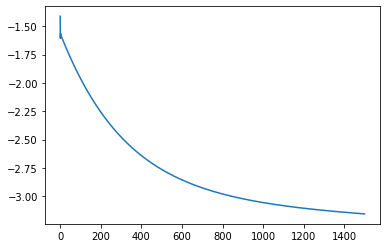

In [43]:
my_log = logistic_regression()
my_log.fit(train_features,train_labels,0.01,1500)

#print(train_features.shape)
#print(train_labels.shape)

In [44]:
pred1 = my_log.predict(test_features)

In [46]:
correct_pred = 0
incorrect_pred = 0
for i in range(len(pred1)):
    if pred1[i] == test_labels[i] :
        correct_pred = correct_pred + 1
    else :
        incorrect_pred = incorrect_pred + 1


acc = correct_pred / len(pred1)
print("Accuracy is ",acc)

Accuracy is  0.7611940298507462


In [49]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(test_labels,pred1))

Confusion Matrix
[[165   2]
 [ 62  39]]
